## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:


inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/MyDrive/ColabNotebooks/Pictures/tomato/train'
valid_path = '/content/gdrive/MyDrive/ColabNotebooks/Pictures/tomato/val'


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/gdrive/MyDrive/ColabNotebooks/Pictures/tomato/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [ ]:
valid_set = valid_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1000 images belonging to 10 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=valid_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

<ipython-input-23-e7c0ff102a36>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/25
313/313 [==============================] - 144s 459ms/step - loss: 1.4178 - accuracy: 0.8898 - val_loss: 5.3529 - val_accuracy: 0.7550
Epoch 2/25
313/313 [==============================] - 143s 455ms/step - loss: 1.5286 - accuracy: 0.8892 - val_loss: 4.1644 - val_accuracy: 0.8100
Epoch 3/25
313/313 [==============================] - 144s 459ms/step - loss: 1.3644 - accuracy: 0.8944 - val_loss: 3.5881 - val_accuracy: 0.8110
Epoch 4/25
313/313 [==============================] - 143s 456ms/step - loss: 1.3779 - accuracy: 0.8996 - val_loss: 4.2722 - val_accuracy: 0.8020
Epoch 5/25
313/313 [==============================] - 143s 456ms/step - loss: 1.1509 - accuracy: 0.9102 - val_loss: 4.1068 - val_accuracy: 0.8170
Epoch 6/25
313/313 [==============================] - 143s 457ms/step - loss: 1.3897 - accuracy: 0.8983 - val_loss: 3.7883 - val_accuracy: 0.8150
Epoch 7/25
313/313 [==============================] - 143s 455ms/step - loss: 1.2789 - accuracy: 0.9078 - val_loss: 4.3816 -

In [ ]:
import matplotlib.pyplot as plt

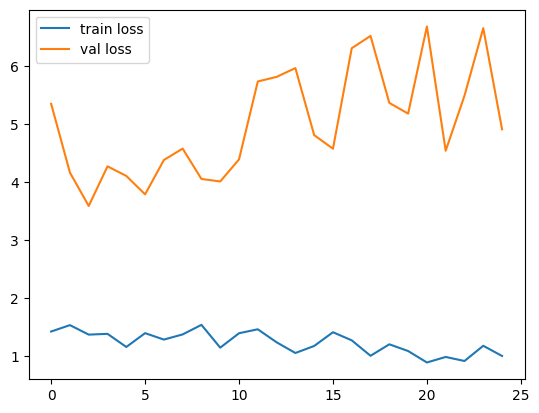

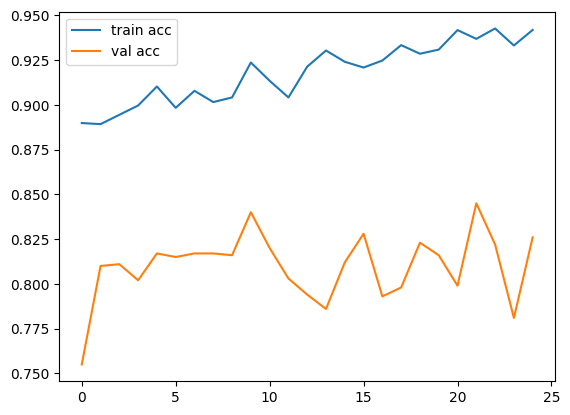

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:

y_pred = model.predict(valid_set)


32/32 [==============================] - 5s 117ms/step


In [ ]:
scores=model.evaluate(valid_set)

32/32 [==============================] - 4s 129ms/step - loss: 4.9120 - accuracy: 0.8260


In [ ]:
scores

[4.912039279937744, 0.8259999752044678]

In [ ]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.2969741e-35, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [5.8227986e-35, 8.6748221e-12, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 8.1424917e-36],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.4429829e-34, 2.0452984e-34, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([7, 2, 1, 7, 5, 4, 5, 9, 9, 1, 8, 6, 8, 7, 6, 7, 2, 9, 1, 1, 9, 8,
       3, 7, 3, 6, 3, 0, 4, 2, 1, 4, 9, 0, 9, 5, 4, 4, 6, 3, 2, 4, 4, 9,
       5, 3, 2, 6, 8, 8, 7, 9, 2, 1, 3, 6, 3, 9, 0, 6, 2, 4, 7, 6, 9, 1,
       5, 4, 6, 6, 4, 5, 6, 6, 0, 9, 0, 2, 9, 3, 1, 1, 6, 3, 4, 0, 3, 8,
       3, 6, 6, 6, 1, 8, 2, 3, 0, 1, 5, 0, 7, 4, 1, 6, 7, 3, 4, 2, 0, 4,
       4, 7, 7, 2, 4, 9, 5, 6, 7, 4, 6, 5, 7, 7, 2, 7, 9, 1, 5, 0, 4, 6,
       8, 7, 1, 9, 0, 5, 2, 4, 2, 3, 9, 7, 5, 2, 2, 3, 1, 4, 3, 8, 9, 6,
       9, 5, 6, 4, 5, 1, 9, 3, 8, 4, 4, 0, 8, 1, 7, 9, 9, 1, 0, 4, 0, 6,
       5, 6, 6, 5, 8, 4, 5, 8, 3, 7, 5, 5, 3, 9, 0, 1, 1, 1, 8, 7, 2, 0,
       4, 3, 0, 5, 1, 1, 4, 5, 4, 6, 0, 6, 2, 5, 0, 8, 1, 1, 4, 8, 9, 0,
       8, 7, 1, 6, 6, 0, 6, 1, 4, 6, 5, 8, 1, 4, 0, 6, 0, 4, 7, 2, 1, 6,
       8, 6, 2, 9, 3, 0, 5, 7, 6, 6, 4, 9, 5, 2, 7, 6, 1, 6, 2, 2, 6, 1,
       1, 3, 7, 3, 6, 7, 0, 3, 1, 1, 8, 0, 1, 3, 5, 1, 9, 0, 0, 0, 5, 5,
       7, 8, 8, 7, 2, 3, 2, 1, 9, 4, 8, 5, 3, 1, 5,

In [ ]:
class_names = list(training_set.class_indices.keys())
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
import tensorflow as tf
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
def returnIndex(labels):
  for i in range(len(labels)):
      if(labels[i]==1):
        return i

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in valid_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[returnIndex(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

Output hidden; open in https://colab.research.google.com to view.